In [1]:
require "daru"
require "statsample"

"if(window['d3'] === undefined ||\n   window['Nyaplot'] === undefined){\n    var path = {\"d3\":\"https://cdnjs.cloudflare.com/ajax/libs/d3/3.5.5/d3.min\",\"downloadable\":\"http://cdn.rawgit.com/domitry/d3-downloadable/master/d3-downloadable\"};\n\n\n\n    var shim = {\"d3\":{\"exports\":\"d3\"},\"downloadable\":{\"exports\":\"downloadable\"}};\n\n    require.config({paths: path, shim:shim});\n\n\nrequire(['d3'], function(d3){window['d3']=d3;console.log('finished loading d3');require(['downloadable'], function(downloadable){window['downloadable']=downloadable;console.log('finished loading downloadable');\n\n\tvar script = d3.select(\"head\")\n\t    .append(\"script\")\n\t    .attr(\"src\", \"http://cdn.rawgit.com/domitry/Nyaplotjs/master/release/nyaplot.js\")\n\t    .attr(\"async\", true);\n\n\tscript[0][0].onload = script[0][0].onreadystatechange = function(){\n\n\n\t    var event = document.createEvent(\"HTMLEvents\");\n\t    event.initEvent(\"load_nyaplot\",false,false);\n\t    win

true

In [2]:
# ニューヨーク市場の銘柄から100のサンプル抽出
stock_ticker = Daru::DataFrame.from_csv("stock_ticker.csv")
sample_ticker = stock_ticker.where(stock_ticker["Exchange"].eq("NYQ"))["Ticker"].to_a.shuffle.take(100)
# Daru::DataFrame.new("Ticker" => sample_ticker).write_csv("sample_ticker.csv")
# ダウンロードはpandasで:)

["HP", "BKK", "EDR", "NSS", "COO", "SBGL", "EFT", "SAR", "GM", "OGS", "SZC", "UFI", "OFC", "HAR", "TREC", "FNF", "DL", "CM", "JP", "ALDW", "NBB", "NSP", "RAS", "JNPR", "ANH", "CGA", "YZC", "SBH", "EVER", "NRF-PC", "PACD", "NMO", "IRET", "CSC", "ALU", "RLH", "CGG", "JFR", "PSA-PX", "SBY", "FGL", "EOS", "RYAM", "REN", "MGU", "DCT", "JMPC", "CRC", "BLD", "NQ", "VTR", "L", "AED", "NXC", "NEP", "TDG", "TG", "EMN", "EXTN", "AVH", "TREX", "HDB", "BSMX", "GEO", "NVO", "MCR", "CRR", "HPF", "LEJU", "RESI", "SBR", "DSM", "ANTM", "NNC", "PNY", "SFG", "DIS", "ALR", "IPI", "TWI", "DEX", "BLT", "NNA", "CI", "FOE", "BGS", "EPE", "ADM", "AFB", "EOD", "ALL-PC", "PLOW", "DSW", "NPT", "EARN", "DCI", "RGA", "HON", "WUBA", "MSI"]

In [3]:
stocks = Dir["stock/*.csv"].map { |file|
  name = file.slice(/([^\/]+)\.csv\z/, 1)
  Daru::DataFrame.from_csv(file, name: name)
  }.select {|stock| stock["Date"][0] == "2006-01-03" }
stocks.size

33

In [4]:
recent_close = Daru::DataFrame.new(close: stocks.flat_map { |stock| stock["Adj Close"][-30..-1].to_a })
recent_close.plot type: :histogram, x: :close

#<Nyaplot::Frame:0x007f6235552b40 @properties={:panes=>[#<Nyaplot::Plot:0x007f6235da44d8 @properties={:diagrams=>[#<Nyaplot::Diagram:0x007f6235553568 @properties={:type=>:histogram, :options=>{:value=>:close}, :data=>"1ca38acc-4254-4e48-afe7-034c66fca9ef"}, @xrange=[0, 200.5], @yrange=[0, 990]>], :options=>{:width=>700, :xrange=>[0, 200.5], :yrange=>[0, 990]}}>], :data=>{"1ca38acc-4254-4e48-afe7-034c66fca9ef"=>#<Nyaplot::DataFrame:0x007f6235585f90 @name="1ca38acc-4254-4e48-afe7-034c66fca9ef", @rows=[{:close=>41.151256}, {:close=>41.031834}, {:close=>40.942267}, {:close=>41.519481}, {:close=>41.081593}, {:close=>41.021884}, {:close=>39.777892}, {:close=>39.628611}, {:close=>38.633418}, {:close=>37.658128000000005}, {:close=>36.971446}, {:close=>37.240145}, {:close=>37.538706}, {:close=>36.28476}, {:close=>36.891829}, {:close=>35.608028000000004}, {:close=>35.757309}, {:close=>35.29952}, {:close=>34.145096}, {:close=>34.981059}, {:close=>34.503362}, {:close=>35.389088}, {:close=>35.259712}, {:close=>35.199999}, {:close=>36.220001}, {:close=>35.5}, {:close=>34.290001000000004}, {:close=>34.34}, {:close=>34.950001}, {:close=>34.459998999999996}, {:close=>200.5}, {:close=>199.41000400000001}, {:close=>200.270004}, {:close=>200.320007}, {:close=>198.740005}, {:close=>197.229996}, {:close=>194.669998}, {:close=>195.5}, {:close=>193.100006}, {:close=>187.809998}, {:close=>182.389999}, {:close=>163.550003}, {:close=>164.009995}, {:close=>157.83999599999999}, {:close=>164.779999}, {:close=>165.0}, {:close=>169.440002}, {:close=>170.0}, {:close=>170.449997}, {:close=>170.179993}, {:close=>170.169998}, {:close=>170.990005}, {:close=>166.919998}, {:close=>160.119995}, {:close=>160.979996}, {:close=>159.270004}, {:close=>155.0}, {:close=>152.369995}, {:close=>153.809998}, {:close=>154.360001}, {:close=>21.709999}, {:close=>21.77}, {:close=>21.790001}, {:close=>21.99}, {:close=>21.74}, {:close=>21.459999}, {:close=>20.860001}, {:close=>21.74}, {:close=>21.860001}, {:close=>21.17}, {:close=>20.77}, {:close=>20.84}, {:close=>20.639999}, {:close=>20.280001000000002}, {:close=>20.32}, {:close=>19.92}, {:close=>19.83}, {:close=>19.629998999999998}, {:close=>20.07}, {:close=>20.4}, {:close=>20.01}, {:close=>20.610001}, {:close=>20.030001000000002}, {:close=>20.16}, {:close=>20.719998999999998}, {:close=>20.690001000000002}, {:close=>20.6}, {:close=>20.469998999999998}, {:close=>20.280001000000002}, {:close=>19.84}, {:close=>9.07}, {:close=>9.08}, {:close=>8.97}, {:close=>9.02}, {:close=>8.91}, {:close=>8.83}, {:close=>8.63}, {:close=>8.66}, {:close=>8.43}, {:close=>8.18}, {:close=>7.89}, {:close=>7.81}, {:close=>7.69}, {:close=>7.57}, {:close=>7.58}, {:close=>7.41}, {:close=>7.33}, {:close=>7.3}, {:close=>6.36}, {:close=>6.3}, {:close=>5.66}, {:close=>5.99}, {:close=>6.32}, {:close=>6.37}, {:close=>6.62}, {:close=>6.74}, {:close=>6.48}, {:close=>6.48}, {:close=>6.69}, {:close=>6.54}, {:close=>13.633788000000001}, {:close=>13.584210999999998}, {:close=>13.574295000000001}, {:close=>13.544549}, {:close=>13.504887}, {:close=>13.286745999999999}, {:close=>13.266916}, {:close=>13.554464999999999}, {:close=>13.633788000000001}, {:close=>13.455309}, {:close=>13.336324}, {:close=>13.257}, {:close=>13.28}, {:close=>12.92}, {:close=>12.96}, {:close=>12.84}, {:close=>12.89}, {:close=>12.66}, {:close=>12.78}, {:close=>13.02}, {:close=>13.01}, {:close=>13.08}, {:close=>13.24}, {:close=>13.39}, {:close=>13.48}, {:close=>13.62}, {:close=>13.62}, {:close=>13.68}, {:close=>13.62}, {:close=>13.56}, {:close=>82.959999}, {:close=>82.550003}, {:close=>82.449997}, {:close=>83.209999}, {:close=>82.16999799999999}, {:close=>81.410004}, {:close=>79.839996}, {:close=>79.57}, {:close=>76.91999799999999}, {:close=>73.790001}, {:close=>73.050003}, {:close=>72.889999}, {:close=>73.120003}, {:close=>71.82}, {:close=>72.07}, {:close=>70.16999799999999}, {:close=>69.290001}, {:close=>67.360001}, {:close=>68.129997}, {:close=>69.870003}, {:close=>67.879997}, {:close=>69.110001}, {

In [5]:
recent_log_close = Daru::DataFrame.new(close: stocks.flat_map { |stock| stock["Adj Close"].tail(30).map { |x| Math.log(x) } })
recent_log_close.plot type: :histogram, x: :close

#<Nyaplot::Frame:0x007f6233f94010 @properties={:panes=>[#<Nyaplot::Plot:0x007f6234a5f210 @properties={:diagrams=>[#<Nyaplot::Diagram:0x007f6233f95258 @properties={:type=>:histogram, :options=>{:value=>:close}, :data=>"ec6c1b42-714d-4170-9f58-88a5aa82c821"}, @xrange=[0, 5.300814246746624], @yrange=[0, 990]>], :options=>{:width=>700, :xrange=>[0, 5.300814246746624], :yrange=>[0, 990]}}>], :data=>{"ec6c1b42-714d-4170-9f58-88a5aa82c821"=>#<Nyaplot::DataFrame:0x007f62340c9638 @name="ec6c1b42-714d-4170-9f58-88a5aa82c821", @rows=[{:close=>3.7172544491360138}, {:close=>3.7143482044558556}, {:close=>3.7121629524177115}, {:close=>3.7261627387795073}, {:close=>3.715560162302668}, {:close=>3.7141056804047508}, {:close=>3.6833112805687382}, {:close=>3.6795513573829584}, {:close=>3.65411765321963}, {:close=>3.6285488140806224}, {:close=>3.6101458849778125}, {:close=>3.6173873460640142}, {:close=>3.6253725606654874}, {:close=>3.5913978184047943}, {:close=>3.607990090211478}, {:close=>3.5725711180533923}, {:close=>3.5767546957959113}, {:close=>3.56386936611309}, {:close=>3.530618973948125}, {:close=>3.554806743574733}, {:close=>3.5410567685648044}, {:close=>3.566403524033797}, {:close=>3.5627410090407343}, {:close=>3.5610460541949602}, {:close=>3.5896114800643226}, {:close=>3.56953269648137}, {:close=>3.53485379563785}, {:close=>3.5363108554693294}, {:close=>3.553918497292122}, {:close=>3.5397992020806304}, {:close=>5.300814246746624}, {:close=>5.295363026780775}, {:close=>5.299666476090368}, {:close=>5.299916122855823}, {:close=>5.2919974629617155}, {:close=>5.284370540134521}, {:close=>5.27130580702739}, {:close=>5.27556037942542}, {:close=>5.263208220506452}, {:close=>5.235430802843786}, {:close=>5.20614724609315}, {:close=>5.097118772327407}, {:close=>5.099927371089072}, {:close=>5.061581836372241}, {:close=>5.104611244818746}, {:close=>5.10594547390058}, {:close=>5.132498893656685}, {:close=>5.135798437050262}, {:close=>5.138441980983442}, {:close=>5.136856659288492}, {:close=>5.136797925630392}, {:close=>5.141605104501977}, {:close=>5.117514643741564}, {:close=>5.075923502897792}, {:close=>5.08128010881778}, {:close=>5.070600900378275}, {:close=>5.043425116919247}, {:close=>5.026311740666404}, {:close=>5.035718061460663}, {:close=>5.03928754314778}, {:close=>3.0777729378284766}, {:close=>3.080532875246456}, {:close=>3.0814511948491385}, {:close=>3.09058780456667}, {:close=>3.0791538816930633}, {:close=>3.0661906906042287}, {:close=>3.0378334975112637}, {:close=>3.0791538816930633}, {:close=>3.0846585284940455}, {:close=>3.0525850851467737}, {:close=>3.033509637888021}, {:close=>3.0368742168851663}, {:close=>3.0272308921637485}, {:close=>3.009635228032646}, {:close=>3.011605622710281}, {:close=>2.991724252156452}, {:close=>2.9871959425317045}, {:close=>2.977058957345933}, {:close=>2.9992261628082466}, {:close=>3.0155349008501706}, {:close=>2.996232148595642}, {:close=>3.0257764434225023}, {:close=>2.997231199602838}, {:close=>3.0037004432031678}, {:close=>3.0310993691287327}, {:close=>3.0296505400899783}, {:close=>3.0252910757955354}, {:close=>3.018960350821218}, {:close=>3.009635228032646}, {:close=>2.987700101856727}, {:close=>2.2049722641270453}, {:close=>2.206074192613202}, {:close=>2.1938856760707046}, {:close=>2.199444334074532}, {:close=>2.187174241482718}, {:close=>2.178155014615869}, {:close=>2.155244505095337}, {:close=>2.1587147225743437}, {:close=>2.131796772013764}, {:close=>2.1016921506146558}, {:close=>2.065596134857783}, {:close=>2.0554049638515948}, {:close=>2.0399207835175526}, {:close=>2.0241930674493576}, {:close=>2.0255131996542803}, {:close=>2.0028304393079956}, {:close=>1.9919755158985601}, {:close=>1.9878743481543455}, {:close=>1.8500283773520307}, {:close=>1.840549633397487}, {:close=>1.7334238922150915}, {:close=>1.7900914121273581}, {:close=>1.843719208158766}, {:close=>1.851599469584072}, {:close=>1.890095369948917}, {:close=>1.9080599249242156}, {:close=>1.8687205103641833}, {:close=>1.8687205103641833}, {:cl

In [6]:
stocks.take(3).map(&:describe)

[
#<Daru::DataFrame:70029868045360 @name = 059c6b2a-7429-4214-953e-8f4dd42da036 @size = 5>
            Adj Close      Close       High        Low       Open     Volume 
     count       2541       2541       2541       2541       2541       2541 
      mean 29.8152883 32.6019875 33.0270643 32.1573988 32.5962732 7469752.18 
       std 6.93589796 7.41711745 7.47317747 7.36546382 7.41141309 4870549.22 
       min  15.902294  17.700001      18.01      15.44      17.41     326300 
       max 44.8646789      49.82 50.2599979  49.189999  49.799999   66396000 
, 
#<Daru::DataFrame:70029867865900 @name = 5e2c493e-bf9e-4b61-90f5-2d07ad3fb7bc @size = 5>
            Adj Close      Close       High        Low       Open     Volume 
     count       2541       2541       2541       2541       2541       2541 
      mean 95.0721392 97.4063636 98.2967335 96.4456710 97.4047265 1913901.37 
       std 58.3412449 57.5375104 57.9734040 57.0685556 57.5674892 1114336.49 
       min 26.9400400       28.6     

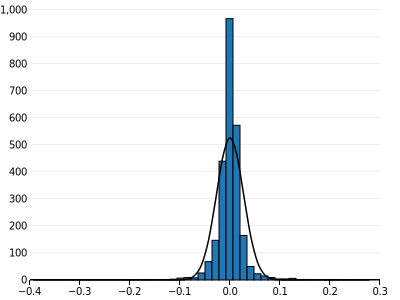

In [7]:
def plot_log_return_hist(stock)
  log_return = Daru::DataFrame.new(
    stock.each_row.each_cons(2).map { |prev, current|
      {date: current["Date"], log_return: Math.log(current["Adj Close"] / prev["Adj Close"])}
    }
  )
#  log_return.plot type: :histogram, x: :log_return do |plot, diagram|
#    plot.yrange([0, 500])
#    diagram.bin_num(150)
#  end
  Statsample::Graph::Histogram.new(log_return[:log_return], line_normal_distribution: true)
end

#stocks.take(3).map { |stock|
#  plot_log_return_hist(stock)
#}
plot_log_return_hist(stocks[0])
